# Artificial Neural Network (ANN)

Little explanations.

**Input:**

Given input must be between 0-1! It should be standardized.

Output can be a value between 0-1 and can be a category.

---

**Activation Functions:**

Any function can be used as activation function but some are preferred more. (Examples: sigmoid, rectifier, tanh)

Activation function returns a output according to its function. If it's a rectifier function, it'll return same input value unless input is <0 if that is the case it'll return 0.

In hidden layer, all neurons do not need to use same activation function!

+ We can use some sort of function when taking output and modify result.

---



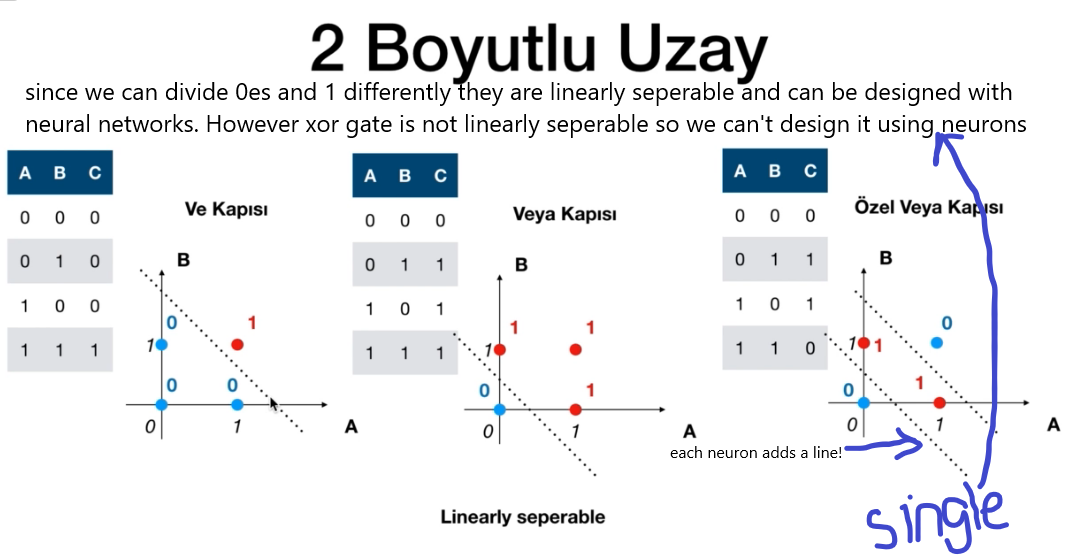

**Learning Rate:**

High learning rate will cause network to suddenly change weights and it won't be able to learn anything. Too low learning rate also cause problems.

BTK 29.5

---

**Gradient Descent:**

In stochastic gradient descent we change parameters for every data.

In batch or mini batch approach we use N number of data to change parameters. 

---

**Epoch:**

[source](https://radiopaedia.org/articles/epoch-machine-learning#:~:text=An%20epoch%20is%20a%20term,of%20data%20is%20very%20large):  a term used in machine learning and indicates the *number of passes of the entire training dataset* the machine learning algorithm has completed.

---


We can use THEANO for using GPU for neural networks. (for local computing)

# Code part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Churn_Modelling.txt")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Preparation

In [22]:
# ID's, surnames will cause system to overfit! We'll delete that columns.
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values

# check for need of encoding -> geoghraphical and gender colon needs encoding
from sklearn.preprocessing import LabelEncoder
# we can use same labelencoder multiple times. We just do it to increase readability.
le1 = LabelEncoder()
X[:,1] = le1.fit_transform(X[:,1])

le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])



# use onehotencoder for geoghraphical places
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float), [1])], 
                        remainder="passthrough")
X = ohe.fit_transform(X)
X = X[:,1:]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
# small x for data X for normalized data!

Creating Neural Network

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Selecting how many layer and neuron a kind of art.
# It what makes ML always need humans.
# However if you have to make something it'll be:
# (output neuron+input neuron)/2    in our example (11+1)/2 = 6

classifier = Sequential()
# set NN that has 11 input neuron and 6 hidden neuron.
# (whole NN will look like triangle right now (11,6,1))
classifier.add(Dense(6, kernel_initializer="uniform", activation="relu",
                     input_dim=11))

# add one more hidden layer
classifier.add(Dense(6, kernel_initializer="uniform", activation="relu"))

# it's recommended that use linear functions for hidden layers and
# sigmoid functions for output layers.

classifier.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

# adam is a kind of algorithm like stochastic gradient descent. 
# since output is either 0 or 1 we'll use binary_crossentropy
# give metrics what needs to be priortizationed.
classifier.compile(optimizer="adam", loss="binary_crossentropy",
                   metrics=['accuracy'])

Train Network

In [30]:
classifier.fit(X_train, y_train, epochs=50)

Epoch 1/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8488
Epoch 2/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8490
Epoch 3/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8488
Epoch 4/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8510
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8516
Epoch 6/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8540
Epoch 7/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8527
Epoch 8/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8555
Epoch 9/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8564
Epoch 10/50
210/210 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8549

Predictions

In [31]:
y_pred = classifier.predict(X_test)

# take certain results.
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2503  114]
 [ 357  326]]


# Dimension Reduction

PCA is UNSUPERVISED, LDA is SUPERVISED

## (PCA - Principal Component Analysis)

Used for: noise filtering, visualization, feature extraction, feature adding/transforming, stock market analysis, health and genetic data...

Reduction of outliers, sparse reduction...

If you need to keep data WITHOUT LOSS don't change dimensions (2,3 etc) when reducing dimensions. Reducing dimension sometimes cause to lose data.
- can to 2 to 2 dimension reduction, for example changing origin position in to the middle of data points.

Eigen values and eigen vectors are important in this subject. (instead can use SVD)

IT MAY CAN ALSO INCREASE PERFORMANCE!

In [44]:
# goal is to reduce 13 input dimension to lesser dimension
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Wine.txt")
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


from sklearn.decomposition import PCA
# n_components is the size of dimension we want to reduce
pca = PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)
# we want to use same values fitted for X_train so only use transform here
X_test2 = pca.transform(X_test)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train2, y_train)

y_pred = classifier.predict(X_test)
y_pred2 = classifier2.predict(X_test2)
y_pred_pca = y_pred2.copy()

from sklearn.metrics import confusion_matrix
print("without pca:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("with pca:")
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print("comprasion of pca and without pca:")
cm3 = confusion_matrix(y_pred, y_pred2)
print(cm3)

without pca:
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
with pca:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
comprasion of pca and without pca:
[[14  0  0]
 [ 1 14  0]
 [ 0  1  6]]


## (LDA - Linear Discriminant Analysis)

Different than PCA, it pay attention to differences between ***classes*** and tries to maximize it.

So for LDA data must be classfied (labeled).

From that perspective PCA is UNSUPERVISED, LDA is SUPERVISED!

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Wine.txt")
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# n_components is the size of dimension we want to reduce
# DIFFERENT THAN PCA WE ALSO GIVE y_train
lda = LDA(n_components=2)
X_train2 = lda.fit_transform(X_train, y_train)
# we want to use same values fitted for X_train so only use transform here
X_test2 = lda.transform(X_test)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train2, y_train)

y_pred = classifier.predict(X_test)
y_pred2 = classifier2.predict(X_test2)

y_pred_lda = y_pred2.copy()

from sklearn.metrics import confusion_matrix
print("without lda:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("with lda:")
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print("comprasion of lda and without lda:")
cm3 = confusion_matrix(y_pred, y_pred2)
print(cm3)

print("comprasion of lda and pca:")
cm3 = confusion_matrix(y_pred_pca, y_pred_lda)
print(cm3)

without lda:
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
with lda:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
comprasion of lda and without lda:
[[14  0  0]
 [ 0 15  0]
 [ 0  1  6]]
comprasion of lda and pca:
[[14  1  0]
 [ 0 15  0]
 [ 0  0  6]]
